# $$\text{Projeto no Espaço de Estados:}$$

In [1]:
import numpy as np
import control as ct
import matplotlib.pyplot as plt
import scienceplots

# Configurações de plot:
plt.style.use([
    'grid',
    'retro'
])
#plt.rcParams['lines.linewidth'] = 2
#plt.rcParams['font.size'] = 20
plt.rcParams['figure.figsize'] = (12, 8)
colors = ['C0', 'C1', 'C2', 'C4', 'C5']

### $$\text{Definição e interconexão do sistema:}$$

In [2]:
A = np.array([
    [0, 1, 0],
    [0, 0, 1],
    [0, 2, -1]
])

B = np.array([0,0,1])[:, np.newaxis]

C = np.array([
    [10, 1, 0],
    [1, 0, 0],
    [0, 1, 0],
    [0, 0, 1]
])

D = np.array([0,0,0,0])[:, np.newaxis]

k = np.array([1343.84, 296.38, 25])

In [3]:
#Sistema:
G = ct.ss(A,B,C,D, inputs=['u'], outputs=['y', 'x1', 'x2', 'x3'])

#Gerando o sinal de feedback:
k1 = ct.tf((k[0]), (1), inputs='x1', outputs='kx1')
k2 = ct.tf((k[1]), (1), inputs='x2', outputs='kx2')
k3 = ct.tf((k[2]), (1), inputs='x3', outputs='kx3')
somfb = ct.summing_junction(inputs=['kx1', 'kx2', 'kx3'], output='feedback')

#Somador que gera o sinal u:
som = ct.summing_junction(inputs=['r', '-feedback'], output='u')

L = ct.interconnect([G, k1, k2, k3, somfb, som], inputs='r', outputs=['u', 'y', 'x1', 'x2', 'x3'])

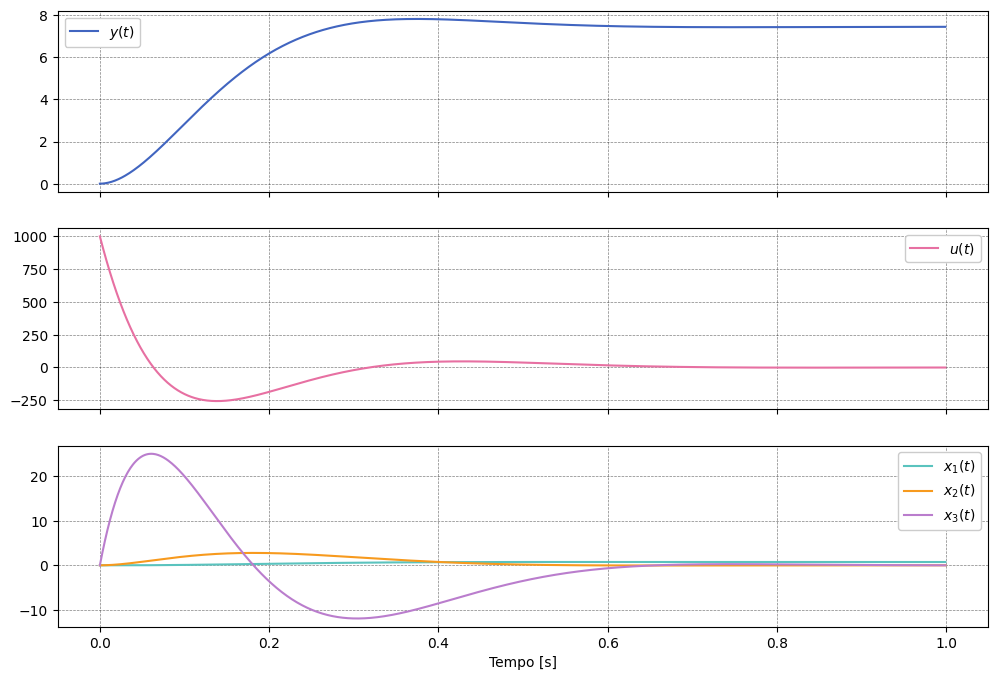

In [6]:
t = np.arange(0, 1, 1e-3)

r = np.ones(t.shape)*1000

t, sol = ct.forced_response(L, t, r)

u = sol[0]
y = sol[1]
x = sol[2:]

labels = ['$x_1(t)$', '$x_2(t)$', '$x_3(t)$']
plt.subplots(3, 1, sharex=True)
plt.subplot(3, 1, 1)
plt.plot(t, y, color='C0', label='$y(t)$')
plt.legend()
plt.subplot(3, 1, 2)
plt.plot(t, u, color='C1', label='$u(t)$')
plt.legend()
plt.subplot(3, 1, 3)
for i in range(len(x)):
    plt.plot(t, x[i], color=colors[i+2], label=labels[i])
plt.xlabel('Tempo [s]')
plt.legend()
plt.show()